In [51]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../src/')

import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
from src import vehicular_data_columns, subject_data_columns, neurophysiological_data_columns, video_data_analysis_columns
from src.preprocess import remove_invalid_data

In [52]:

# Paths to the files
feature_track_path = '../data/Feature_Track.xlsx'
feature_simulation_path = '../data/Feature_Simulation.xlsx'

# Reading the datasets
feature_track_df = pd.read_excel(feature_track_path)
feature_simulation_df = pd.read_excel(feature_simulation_path)


## Check Lap Events
this dont work, skip

In [53]:
# # tried to check if you can sequentially compare subject-lap pair -> but no
# # Redefining the event_columns list as provided by the user
# event_columns = [
#     "straight", "roundabout_entry", "roundabout_exit", "zebra_crossing",
#     "left_turn", "u_turn", "bypass_dummy", "car", "pedestrian",
#     "traffic_light", "narrow_road", "dummy", "bend"
# ]
#
# # Filter the dataframes to include only the relevant columns for comparison
# relevant_columns = ['subject', 'lap', 'start_time'] + event_columns
# track_filtered = feature_track_data[relevant_columns]
# simulation_filtered = feature_simulation_data[relevant_columns]
#
# # Processing both datasets
# # Setting the index to subject, lap, and start_time for both datasets
# track_indexed = track_filtered.set_index(['subject', 'lap', 'start_time'])
# simulation_indexed = simulation_filtered.set_index(['subject', 'lap', 'start_time'])
#
# # Function to compare rows across all subjects for a given lap and start_time
# # Function to create a nested dictionary for lap and start_time with lists of events per subject
# def create_events_dict(df):
#     df = df.reset_index().set_index(['subject', 'lap'])
#     df.sort_values(by=['subject', 'lap', 'start_time'], inplace=True)
#     df = df.reset_index()
#
#     df['start_time_index'] = df.groupby(['subject', 'lap']).cumcount()
#     df = df.reset_index().set_index(['subject', 'lap', 'start_time_index'])
#     display(df)
#
#     events_dict = {}
#
#     for (subject, lap, start_time), row in df.iterrows():
#         if lap not in events_dict:
#             events_dict[lap] = {}
#         if start_time not in events_dict[lap]:
#             events_dict[lap][start_time] = []
#
#         # Adding the events list for this subject at this lap and start_time
#         events_dict[lap][start_time].append(row[event_columns].tolist())
#
#     return events_dict
#
# # Creating the nested dictionary for both datasets
# track_events_dict = create_events_dict(track_indexed)
# simulation_events_dict = create_events_dict(simulation_indexed)
# result = {}
# for lap in track_events_dict.keys():
#     result[lap] = {}
#     for ti in track_events_dict[lap].keys():
#         is_matched = True
#         result[lap][ti] = is_matched
#         current = track_events_dict[lap][ti][0]
#         for i in range(1, len(track_events_dict[lap][ti])):
#             if current != track_events_dict[lap][ti][i]:
#                 print(lap, ti, 0, i)
#                 print('current', current)
#                 print('comp', track_events_dict[lap][ti][i])
#                 is_matched = False
#         result[lap][ti] = is_matched
#


## Check invalid columns

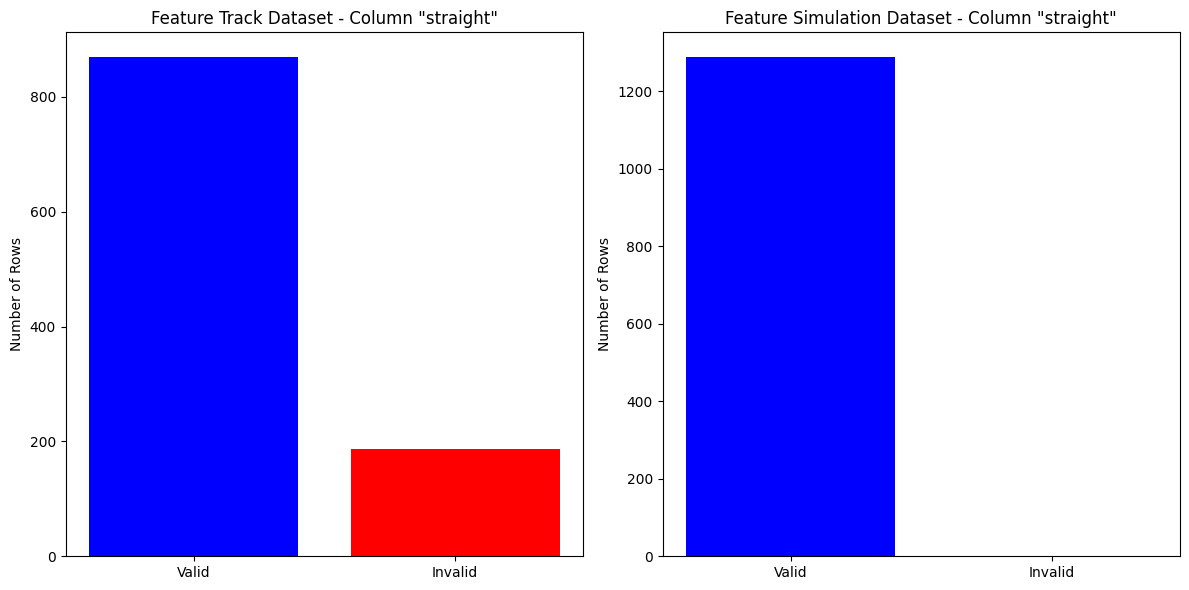

In [54]:
import matplotlib.pyplot as plt

# Checking for invalid values in 'straight' column for both datasets
# Valid values are either 0 or 1
invalid_straight_track = feature_track_df[~feature_track_df['straight'].isin([0, 1])]
invalid_straight_simulation = feature_simulation_df[~feature_simulation_df['straight'].isin([0, 1])]

# Counting valid and invalid rows for 'straight' column in both datasets
valid_invalid_counts_track = {'Valid': len(feature_track_df) - len(invalid_straight_track), 'Invalid': len(invalid_straight_track)}
valid_invalid_counts_simulation = {'Valid': len(feature_simulation_df) - len(invalid_straight_simulation), 'Invalid': len(invalid_straight_simulation)}

# Plotting the results in a bar plot
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].bar(valid_invalid_counts_track.keys(), valid_invalid_counts_track.values(), color=['blue', 'red'])
ax[0].set_title('Feature Track Dataset - Column "straight"')
ax[0].set_ylabel('Number of Rows')

ax[1].bar(valid_invalid_counts_simulation.keys(), valid_invalid_counts_simulation.values(), color=['blue', 'red'])
ax[1].set_title('Feature Simulation Dataset - Column "straight"')
ax[1].set_ylabel('Number of Rows')

plt.tight_layout()
plt.show()


In [55]:
# Function to calculate valid and invalid rows for each column in a DataFrame
def calculate_valid_invalid_rows(df):
    valid_invalid_counts = {}
    for column in df.columns:
        valid_count = df[column].notna().sum()
        invalid_count = df[column].isna().sum()
        if invalid_count > 0:  # Only consider columns with invalid (NaN) values
            valid_invalid_counts[column] = {'Valid': valid_count, 'Invalid': invalid_count}
    return valid_invalid_counts

# Calculate valid and invalid rows for both datasets
valid_invalid_counts_track = calculate_valid_invalid_rows(feature_track_df)
valid_invalid_counts_simulation = calculate_valid_invalid_rows(feature_simulation_df)

# Display the results
valid_invalid_counts_track, valid_invalid_counts_simulation


({'max_speed': {'Valid': 1012, 'Invalid': 44},
  'avg_speed': {'Valid': 1012, 'Invalid': 44},
  'std_speed': {'Valid': 1012, 'Invalid': 44},
  'hr': {'Valid': 711, 'Invalid': 345},
  'hrv_lf': {'Valid': 711, 'Invalid': 345},
  'hrv_hf': {'Valid': 711, 'Invalid': 345},
  'hrv_lfhf_ratio': {'Valid': 711, 'Invalid': 345},
  'gsr_tonic': {'Valid': 816, 'Invalid': 240},
  'gsr_phasic': {'Valid': 816, 'Invalid': 240},
  'gsr_peaks': {'Valid': 816, 'Invalid': 240},
  'EBRmean': {'Valid': 717, 'Invalid': 339},
  'BDmean': {'Valid': 715, 'Invalid': 341},
  'ThetaFrontal': {'Valid': 809, 'Invalid': 247},
  'ThetaParietal': {'Valid': 809, 'Invalid': 247},
  'AlphaFrontal': {'Valid': 809, 'Invalid': 247},
  'AlphaParietal': {'Valid': 809, 'Invalid': 247},
  'LowerAlphaFrontal': {'Valid': 809, 'Invalid': 247},
  'LowerAlphaParietal': {'Valid': 809, 'Invalid': 247},
  'UpperAlphaFrontal': {'Valid': 809, 'Invalid': 247},
  'UpperAlphaParietal': {'Valid': 809, 'Invalid': 247},
  'BetaFrontal': {'Valid

## Preprocessing to remove invalid data

In [68]:
# Example usage
cleaned_feature_track = remove_invalid_data(
    feature_track_df,
    columns_with_defined_valid_values={'straight': [0, 1]},
)

cleaned_feature_simulation = remove_invalid_data(
    feature_simulation_df,
    columns_with_defined_valid_values={'straight': [0, 1]},
)


## PCA Comparative Analysis

In [78]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

def compare_datasets_with_pca(df1, df2, comparison_columns, label_column=None):
    """
    Compare two datasets using PCA and visualize in 2D plot.

    Parameters:
    df1, df2 (DataFrame): The two DataFrames to compare.
    comparison_columns (list): List of columns to use for PCA.
    label_column (str, optional): Column name to use for labeling points. If None, label by dataset.

    Returns:
    None: The function plots the PCA comparison.
    """
    # Prepare the data
    df1_pca = df1[comparison_columns].copy()
    df2_pca = df2[comparison_columns].copy()
    df1_pca['Dataset'] = 'Track'
    df2_pca['Dataset'] = 'Simulation'

    # Append dataset prefix to label column if it exists
    if label_column:
        df1_pca['Label'] = df1[label_column].astype(str) + '_Track'
        df2_pca['Label'] = df2[label_column].astype(str) + '_Simulation'
    else:
        df1_pca['Label'] = 'Track'
        df2_pca['Label'] = 'Simulation'

    combined_df_pca = pd.concat([df1_pca, df2_pca], ignore_index=True)

    # Perform PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(combined_df_pca[comparison_columns])
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_df['Label'] = combined_df_pca['Label']

    # Plotting
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Label', style='Label', s=100)
    plt.title("PCA Comparison between Track and Simulation Datasets")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend()
    plt.show()

# Example usage:
# compare_datasets_with_pca(feature_track_df, feature_simulation_df, comparison_columns=['col1', 'col2', ...], label_column='your_label_column')


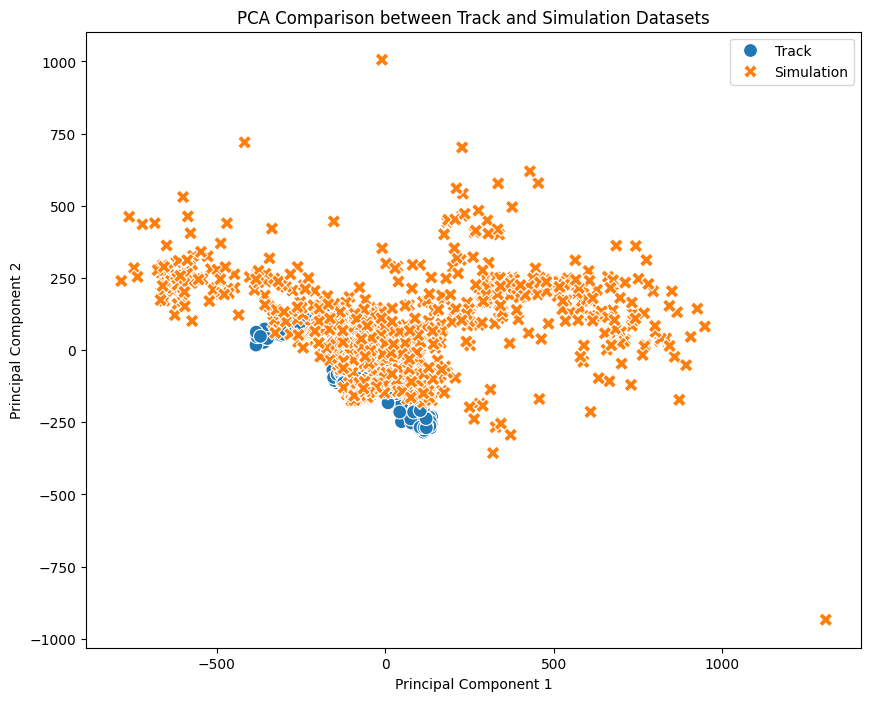

In [80]:
compare_datasets_with_pca(cleaned_feature_track, cleaned_feature_simulation, comparison_columns=vehicular_data_columns + neurophysiological_data_columns, label_column=None)


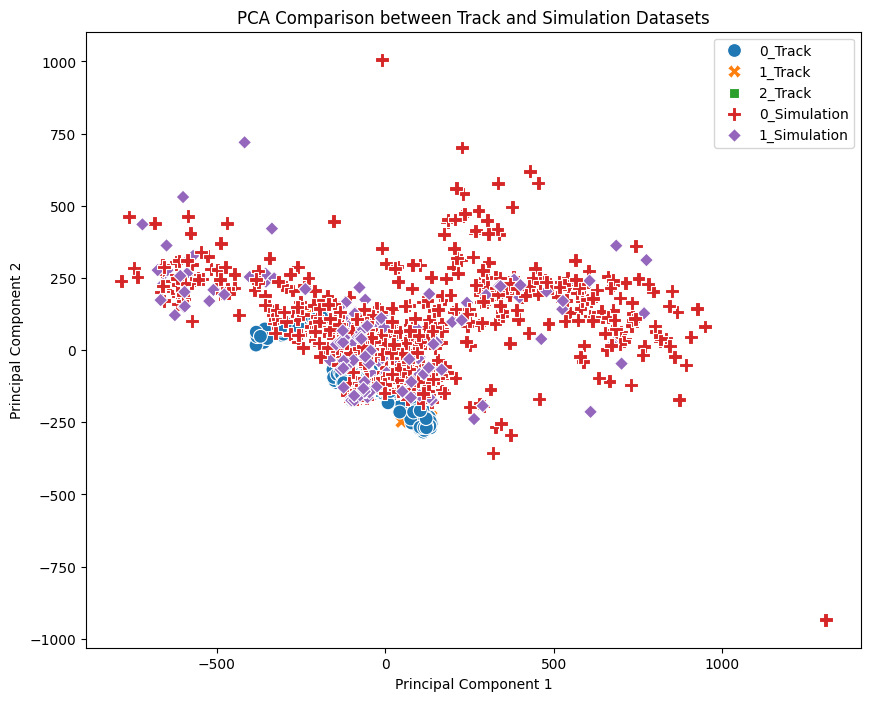

In [81]:
compare_datasets_with_pca(cleaned_feature_track, cleaned_feature_simulation, comparison_columns=vehicular_data_columns + neurophysiological_data_columns, label_column="risk_evaluation")


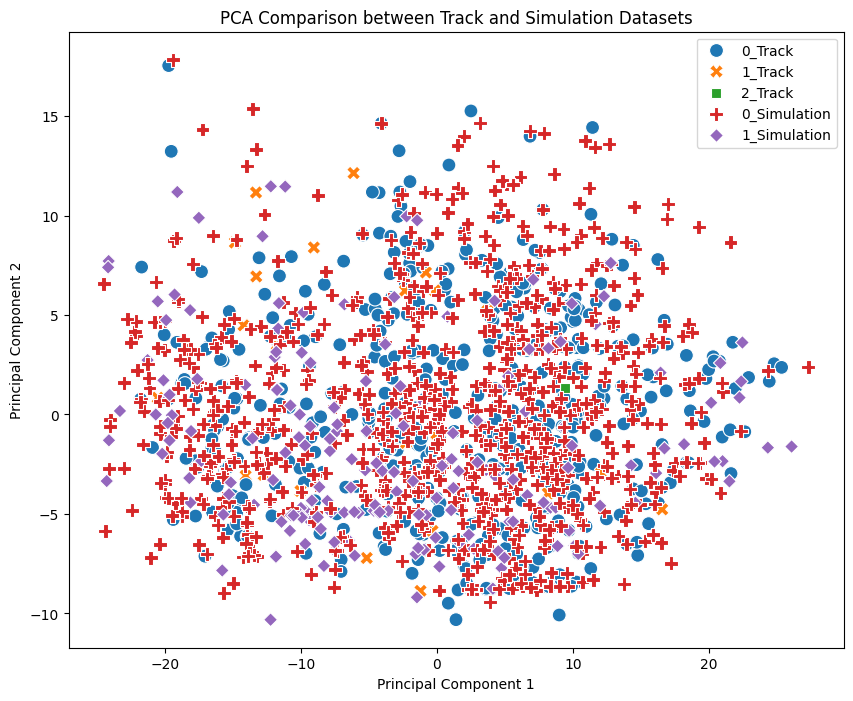

In [82]:
compare_datasets_with_pca(cleaned_feature_track, cleaned_feature_simulation, comparison_columns=neurophysiological_data_columns, label_column="risk_evaluation")


In [88]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

def train_one_class_svm_anomaly_detection(train_df, validation_df, feature_columns, label_column='risk_evaluation'):
    # Prepare the data
    # Negative data points are considered 'normal'
    normal_data = train_df[train_df[label_column] == 0][feature_columns]

    # Train the One-Class SVM
    oc_svm_model = OneClassSVM(kernel ='sigmoid', nu=0.01)  # nu is an upper bound on the fraction of training errors
    oc_svm_model.fit(normal_data)

    # Function to evaluate the model
    def evaluate_model(data_df, true_label_column):
        X = data_df[feature_columns]
        y_true = data_df[true_label_column].apply(lambda x: 1 if x > 0 else -1)
        y_pred = oc_svm_model.predict(X)

        # In one-class SVM, -1 is the label for an outlier/anomaly
        y_pred = np.where(y_pred == 1, -1, 1)

        print(confusion_matrix(y_true, y_pred))
        print(classification_report(y_true, y_pred, target_names=['Normal', 'Anomaly']))

    # Evaluate on the test set (remaining part of the simulation data)
    print("Test Set Evaluation:")
    evaluate_model(train_df, label_column)

    # Validate on the track data
    print("Validation Set Evaluation:")
    evaluate_model(validation_df, label_column)

# Example usage:
# train_one_class_svm_anomaly_detection(feature_simulation_df, feature_track_df, feature_columns=your_feature_columns)


In [89]:
# Example usage:
columns = vehicular_data_columns + neurophysiological_data_columns + ['risk_evaluation']
train_one_class_svm_anomaly_detection(cleaned_feature_simulation[columns], cleaned_feature_track[columns], feature_columns=vehicular_data_columns + neurophysiological_data_columns, label_column='risk_evaluation')

Test Set Evaluation:
[[803   7]
 [181   4]]
              precision    recall  f1-score   support

      Normal       0.82      0.99      0.90       810
     Anomaly       0.36      0.02      0.04       185

    accuracy                           0.81       995
   macro avg       0.59      0.51      0.47       995
weighted avg       0.73      0.81      0.74       995

Validation Set Evaluation:
[[459  56]
 [ 21   3]]
              precision    recall  f1-score   support

      Normal       0.96      0.89      0.92       515
     Anomaly       0.05      0.12      0.07        24

    accuracy                           0.86       539
   macro avg       0.50      0.51      0.50       539
weighted avg       0.92      0.86      0.88       539



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_matrices(simulated_df, tracked_df, features_to_correlate):
    """
    Plot correlation matrices for simulated and tracked datasets.

    Parameters:
    simulated_df (DataFrame): The simulated dataset DataFrame.
    tracked_df (DataFrame): The tracked dataset DataFrame.
    features_to_correlate (list): List of feature column names to correlate.
    """
    # Filter datasets based on the features to correlate
    sim_corr = simulated_df[features_to_correlate].corr()
    track_corr = tracked_df[features_to_correlate].corr()

    # Plotting
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))

    sns.heatmap(sim_corr, annot=True, cmap='coolwarm', ax=ax[0])
    ax[0].set_title('Correlation Matrix - Simulated Dataset')

    sns.heatmap(track_corr, annot=True, cmap='coolwarm', ax=ax[1])
    ax[1].set_title('Correlation Matrix - Tracked Dataset')

    plt.show()



In [ ]:
plot_correlation_matrices(simulated_df=feature_simulation_df, tracked_df=feature_track_df, features_to_correlate=video_data_analysis_columns)
